<a href="https://colab.research.google.com/github/Harsha-chikkala/Heart-Stroke-Prediction-using-Machine-Learning-A-hybrid-feature-selection-approach/blob/main/Heart_Stroke_Prediction_using_Machine_Learning_A_hybrid_feature_selection_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
data= pd.read_csv("/content/Stroke.csv")

In [ ]:
print(data.head())

      ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   Stroke  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  object 
 2   Age                43400 non-null  float64
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  object 
 6   Work_Type          43400 non-null  object 
 7   Residence_Type     43400 non-null  object 
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                41938 non-null  float64
 10  Smoking_Status     30108 non-null  object 
 11  Stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
BMI,1462


In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
BMI,1462,3.368664
Smoking_Status,13292,30.626728


In [ ]:
binary_columns = ['Gender', 'Ever_Married', 'Residence_Type']
label_encoder = LabelEncoder()

for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

data['Smoking_Status'] = label_encoder.fit_transform(data['Smoking_Status'].astype(str))
data.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,1,3.0,0,0,0,children,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,Private,1,87.96,39.2,2,0
2,16523,0,8.0,0,0,0,Private,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,Private,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,Never_worked,0,161.28,19.1,1,0


In [ ]:


missing_smoking_status = data['Smoking_Status'].isnull().sum()
print(f"Missing Smoking_Status values: {missing_smoking_status}")

if missing_smoking_status > 0:

    known_smoking = data[data['Smoking_Status'].notnull()].copy()
    unknown_smoking = data[data['Smoking_Status'].isnull()].copy()
    if unknown_smoking.empty:
        print("No missing values in Smoking_Status to predict.")
    else:
        categorical_columns = ['Work_Type', 'Gender', 'Ever_Married', 'Residence_Type']

        for col in categorical_columns:
            known_smoking.loc[:, col] = label_encoder.fit_transform(known_smoking[col])
            unknown_smoking.loc[:, col] = label_encoder.transform(unknown_smoking[col])

        features = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
                    'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI']

        X_train = known_smoking[features]
        y_train = known_smoking['Smoking_Status']
        X_unknown = unknown_smoking[features]

        dt_classifier = DecisionTreeClassifier(random_state=42)
        dt_classifier.fit(X_train, y_train)
        predicted_smoking = dt_classifier.predict(X_unknown)

        data.loc[data['Smoking_Status'].isnull(), 'Smoking_Status'] = predicted_smoking
else:
    print("No missing values in Smoking_Status.")


Missing Smoking_Status values: 0
No missing values in Smoking_Status.


In [ ]:

data['BMI'] = data['BMI'].fillna(data['BMI'].mean())


In [ ]:
data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
BMI,0


In [ ]:
data = pd.get_dummies(data, columns=['Work_Type'], drop_first=True)
data.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children
0,30669,1,3.0,0,0,0,0,95.12,18.0,1,0,False,False,False,True
1,30468,1,58.0,1,0,1,1,87.96,39.2,2,0,False,True,False,False
2,16523,0,8.0,0,0,0,1,110.89,17.6,1,0,False,True,False,False
3,56543,0,70.0,0,0,1,0,69.04,35.9,0,0,False,True,False,False
4,46136,1,14.0,0,0,0,0,161.28,19.1,1,0,True,False,False,False


In [ ]:

data.drop(columns=['ID'], inplace=True)

Stroke distribution:
 Stroke
0    42617
1      783
Name: count, dtype: int64


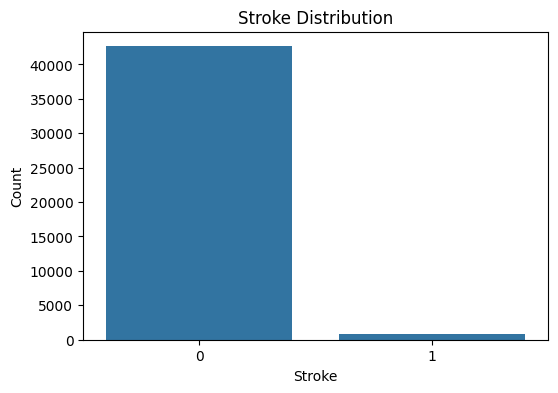

In [ ]:
stroke_counts = data['Stroke'].value_counts()
print("Stroke distribution:\n", stroke_counts)


plt.figure(figsize=(6, 4))
sns.countplot(x='Stroke', data=data)
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [ ]:

X = data.drop('Stroke', axis=1)
y = data['Stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

new_counts = y_resampled.value_counts()
print("New Stroke distribution after SMOTE:\n", new_counts)

New Stroke distribution after SMOTE:
 Stroke
0    42617
1    42617
Name: count, dtype: int64


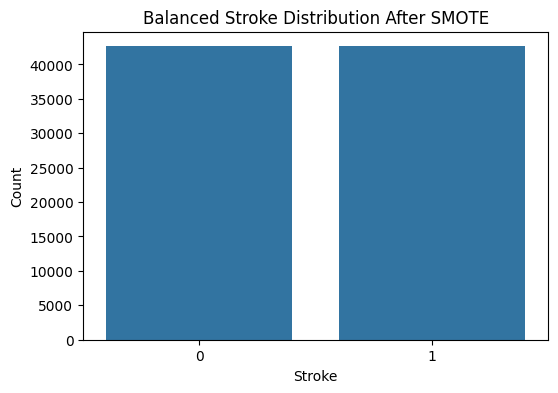

In [ ]:
resampled_data = pd.DataFrame(X_resampled, columns=data.columns[:-1])
resampled_data['Stroke'] = y_resampled

plt.figure(figsize=(6, 4))
sns.countplot(x='Stroke', data=resampled_data)
plt.title('Balanced Stroke Distribution After SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [ ]:

def detect_outliers_iqr(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    for col in numerical_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()

    return outliers


outliers = detect_outliers_iqr(data)
print("Outliers detected in each numerical feature:")
for feature, indices in outliers.items():
    print(f"{feature}: {len(indices)} outliers")


Outliers detected in each numerical feature:
Gender: 0 outliers
Age: 0 outliers
Hypertension: 4061 outliers
Heart_Disease: 2062 outliers
Ever_Married: 0 outliers
Residence_Type: 0 outliers
Avg_Glucose_Level: 4978 outliers
BMI: 1084 outliers
Smoking_Status: 0 outliers
Stroke: 783 outliers


In [ ]:



numerical_cols = ['Age', 'Avg_Glucose_Level', 'BMI',
                  'Hypertension', 'Heart_Disease',
                  'Smoking_Status', 'Stroke']

def cap_outliers(df, columns):
    for col in columns:
        cap_value = df[col].quantile(0.95)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
        floor_value = df[col].quantile(0.05)
        df[col] = np.where(df[col] < floor_value, floor_value, df[col])
    return df

data = cap_outliers(data, numerical_cols)

for col in numerical_cols:
    print(f'After handling outliers, {col} outliers: ')
    outliers_count = ((data[col] > data[col].quantile(0.95)) | (data[col] < data[col].quantile(0.05))).sum()
    print(f'  {outliers_count} outliers remain\n')


After handling outliers, Age outliers: 
  0 outliers remain

After handling outliers, Avg_Glucose_Level outliers: 
  2170 outliers remain

After handling outliers, BMI outliers: 
  0 outliers remain

After handling outliers, Hypertension outliers: 
  0 outliers remain

After handling outliers, Heart_Disease outliers: 
  0 outliers remain

After handling outliers, Smoking_Status outliers: 
  0 outliers remain

After handling outliers, Stroke outliers: 
  0 outliers remain



In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data[numerical_cols].head())


     Gender       Age  Hypertension  Heart_Disease  Ever_Married  \
0  1.201081 -1.725755     -0.321296            0.0     -1.344203   
1  1.201081  0.712856      3.112398            0.0      0.743935   
2 -0.830841 -1.545117     -0.321296            0.0     -1.344203   
3 -0.830841  1.254769     -0.321296            0.0      0.743935   
4  1.201081 -1.274161     -0.321296            0.0     -1.344203   

   Residence_Type  Avg_Glucose_Level       BMI  Smoking_Status  Stroke  
0       -1.002584          -0.214241 -1.546998       -0.527333     0.0  
1        0.997423          -0.390897  1.607253        0.528111     0.0  
2        0.997423           0.174847 -1.606512       -0.527333     0.0  
3       -1.002584          -0.857703  1.116262       -1.582778     0.0  
4       -1.002584           1.418100 -1.383334       -0.527333     0.0  


In [ ]:
data.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children
0,1.201081,-1.725755,-0.321296,0.0,-1.344203,-1.002584,-0.214241,-1.546998,-0.527333,0.0,False,False,False,True
1,1.201081,0.712856,3.112398,0.0,0.743935,0.997423,-0.390897,1.607253,0.528111,0.0,False,True,False,False
2,-0.830841,-1.545117,-0.321296,0.0,-1.344203,0.997423,0.174847,-1.606512,-0.527333,0.0,False,True,False,False
3,-0.830841,1.254769,-0.321296,0.0,0.743935,-1.002584,-0.857703,1.116262,-1.582778,0.0,False,True,False,False
4,1.201081,-1.274161,-0.321296,0.0,-1.344203,-1.002584,1.418100,-1.383334,-0.527333,0.0,True,False,False,False


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [ ]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


K-Nearest Neighbors (KNN):
Accuracy: 0.9221
Precision: 0.8692
Recall: 0.9938
F1 Score: 0.9274


In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


Decision Tree:
Accuracy: 0.9576
Precision: 0.9497
Recall: 0.9665
F1 Score: 0.9580


In [ ]:

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")


Logistic Regression:
Accuracy: 0.8343
Precision: 0.8284
Recall: 0.8435
F1 Score: 0.8359


In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Random Forest:
Accuracy: 0.9752
Precision: 0.9694
Recall: 0.9815
F1 Score: 0.9754


In [ ]:

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")


XGBoost:
Accuracy: 0.9602
Precision: 0.9586
Recall: 0.9619
F1 Score: 0.9603


                 Model   Accuracy  Precision     Recall   F1 Score
0  K-Nearest Neighbors  92.209925  86.921447  99.382475  92.735230
1        Decision Tree  95.764733  94.969278  96.654420  95.804440
2  Logistic Regression  83.430449  82.842008  84.350817  83.589605
3        Random Forest  97.520629  96.935073  98.147424  97.537482
4              XGBoost  96.018928  95.863520  96.193231  96.028092


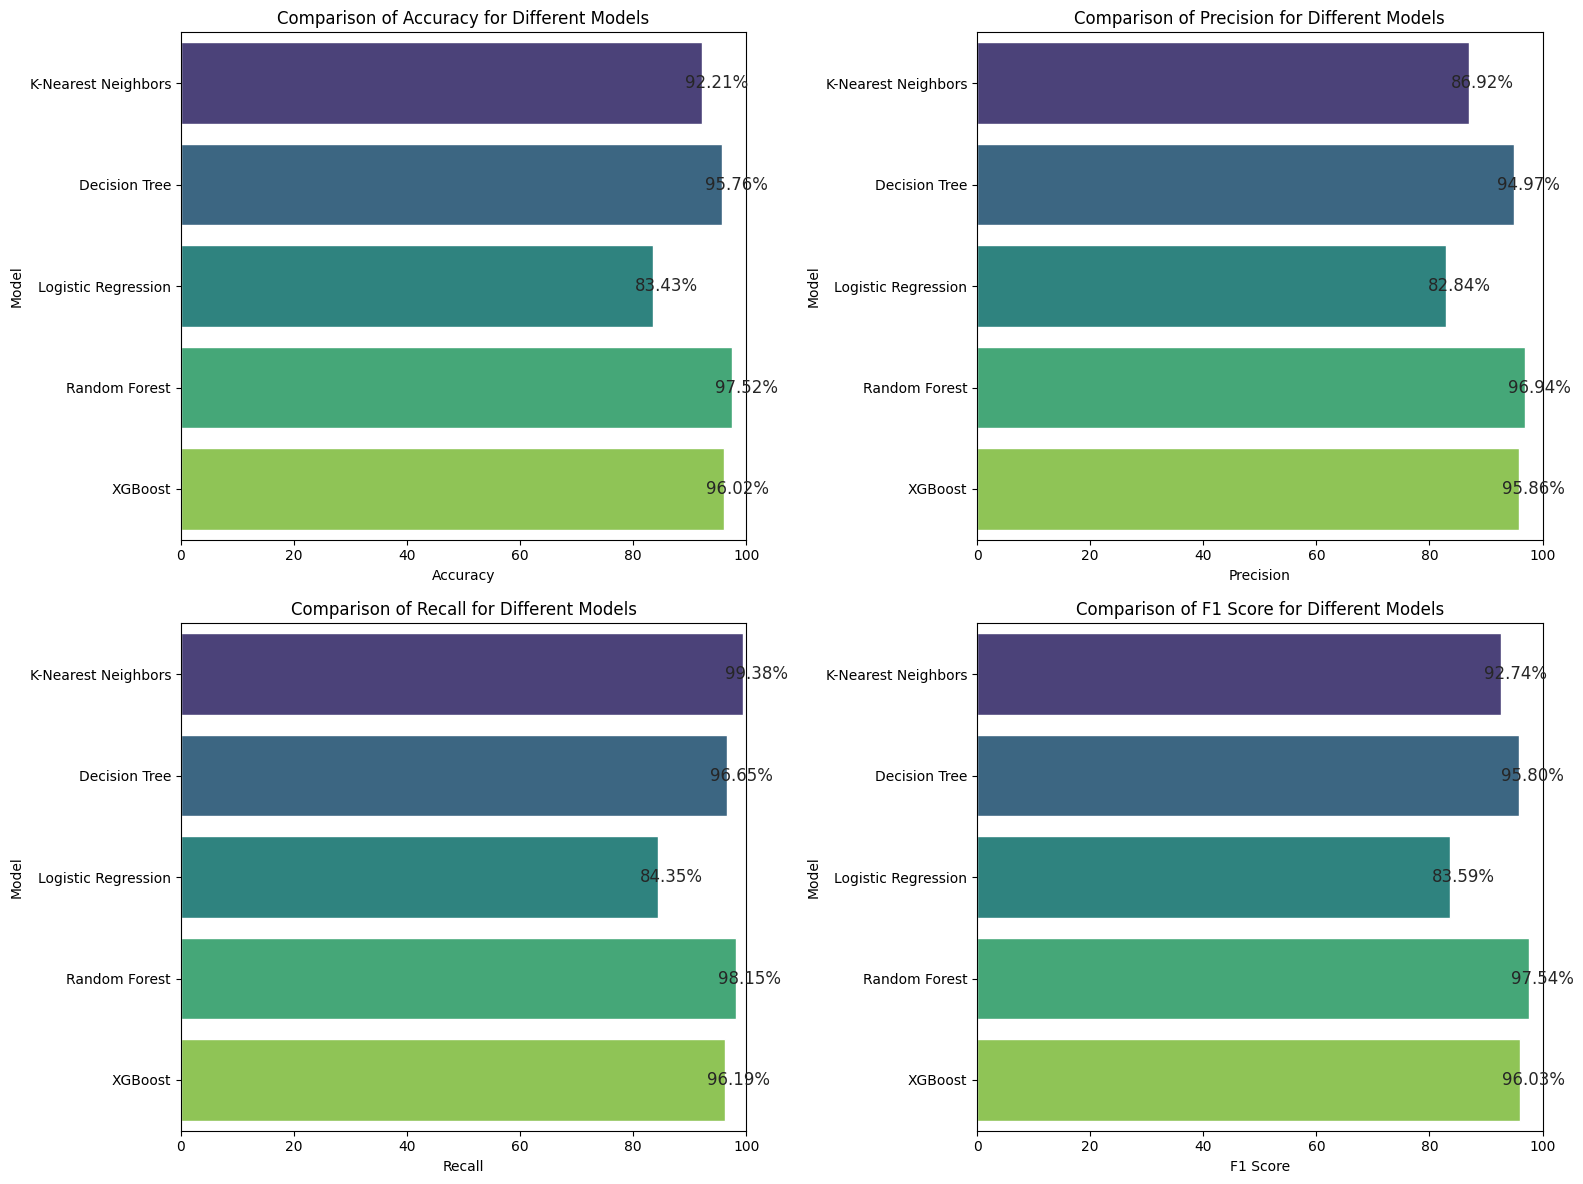

In [ ]:
metrics_summary = {
    'Model': ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn * 100, accuracy_dt * 100, accuracy_lr * 100, accuracy_rf * 100, accuracy_xgb * 100],
    'Precision': [precision_knn * 100, precision_dt * 100, precision_lr * 100, precision_rf * 100, precision_xgb * 100],
    'Recall': [recall_knn * 100, recall_dt * 100, recall_lr * 100, recall_rf * 100, recall_xgb * 100],
    'F1 Score': [f1_knn * 100, f1_dt * 100, f1_lr * 100, f1_rf * 100, f1_xgb * 100]
}
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style="whitegrid")

for i, metric in enumerate(metrics):
    sns.barplot(
        x=metric,
        y='Model',
        data=metrics_df,
        ax=axes[i // 2, i % 2],
        hue='Model',
        dodge=False,
        palette="viridis",
        legend=False
    )
    axes[i // 2, i % 2].set_title(f'Comparison of {metric} for Different Models')
    axes[i // 2, i % 2].set_xlim(0, 100)
    for p in axes[i // 2, i % 2].patches:
        width = p.get_width()
        axes[i // 2, i % 2].annotate(f'{width:.2f}%', (width, p.get_y() + p.get_height() / 2),
                                     ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

print("Original number of features:", X_resampled.shape[1])

low_variance_filter = VarianceThreshold(threshold=0.01)
X_low_variance = low_variance_filter.fit_transform(X_resampled)

X_low_variance_df = pd.DataFrame(X_low_variance, columns=X_resampled.columns[low_variance_filter.get_support()])


print("Number of features after low variance filter:", X_low_variance_df.shape[1])
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_low_variance_df)
X_pca_df = pd.DataFrame(X_pca)

print("Number of features after PCA:", X_pca_df.shape[1])

explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)



Original number of features: 13
Number of features after low variance filter: 12
Number of features after PCA: 5
Explained variance by each component: [8.51467430e-01 1.36171014e-01 1.17695756e-02 2.58625313e-04
 8.27982815e-05]


In [ ]:

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)

knn_model_pca = KNeighborsClassifier()
dt_model_pca = DecisionTreeClassifier(random_state=42)
lr_model_pca = LogisticRegression(max_iter=1000, random_state=42)
rf_model_pca = RandomForestClassifier(random_state=42)
xgb_model_pca = XGBClassifier(eval_metric='logloss', random_state=42)

models_pca = {
    'K-Nearest Neighbors': knn_model_pca,
    'Decision Tree': dt_model_pca,
    'Logistic Regression': lr_model_pca,
    'Random Forest': rf_model_pca,
    'XGBoost': xgb_model_pca
}

results_pca = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models_pca.items():

    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)
    results_pca['Model'].append(name)
    results_pca['Accuracy'].append(accuracy_score(y_test_pca, y_pred) * 100)
    results_pca['Precision'].append(precision_score(y_test_pca, y_pred) * 100)
    results_pca['Recall'].append(recall_score(y_test_pca, y_pred) * 100)
    results_pca['F1 Score'].append(f1_score(y_test_pca, y_pred) * 100)


metrics_df_pca = pd.DataFrame(results_pca)
print("Model Performance After Feature Selection with n components = 5 :")
print(metrics_df_pca)

comparison_df = pd.DataFrame({
    'Model': metrics_df['Model'],
    'Accuracy_Before': metrics_df['Accuracy'],
    'Accuracy_After': metrics_df_pca['Accuracy'],
    'F1_Before': metrics_df['F1 Score'],
    'F1_After': metrics_df_pca['F1 Score']
})

Model Performance After Feature Selection with n components = 5 :
                 Model   Accuracy  Precision     Recall   F1 Score
0  K-Nearest Neighbors  91.752376  86.523998  98.921285  92.308253
1        Decision Tree  93.484807  92.087147  95.153600  93.595264
2  Logistic Regression  77.720856  76.019361  81.028688  78.444133
3        Random Forest  96.425638  95.020086  97.991089  96.482721
4              XGBoost  92.483673  90.070033  95.505354  92.708096


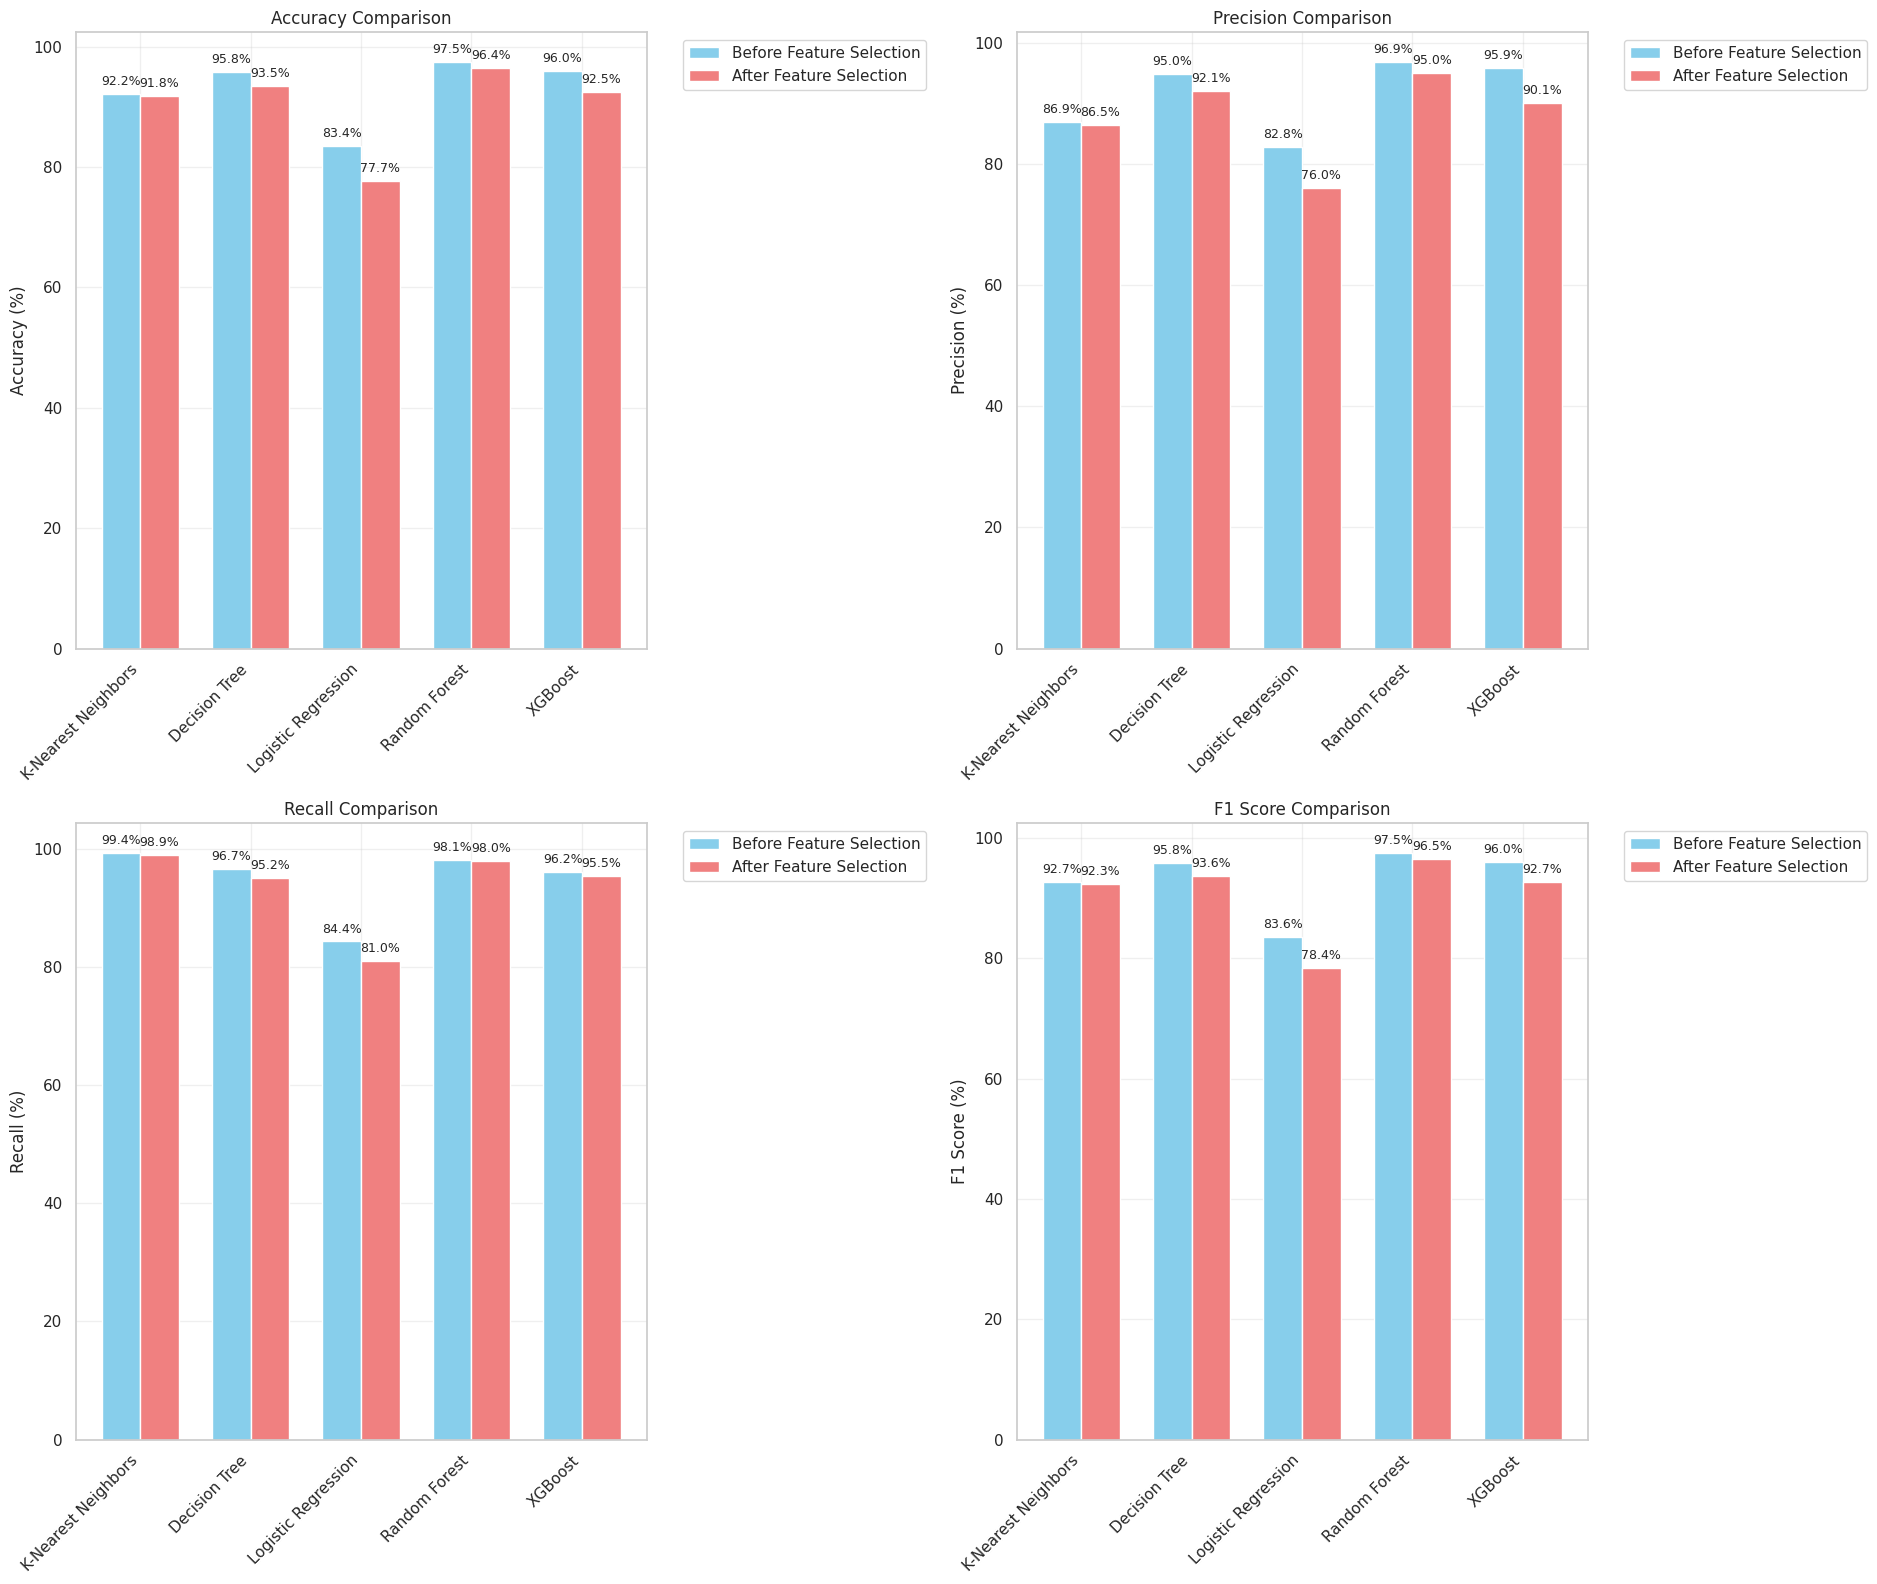

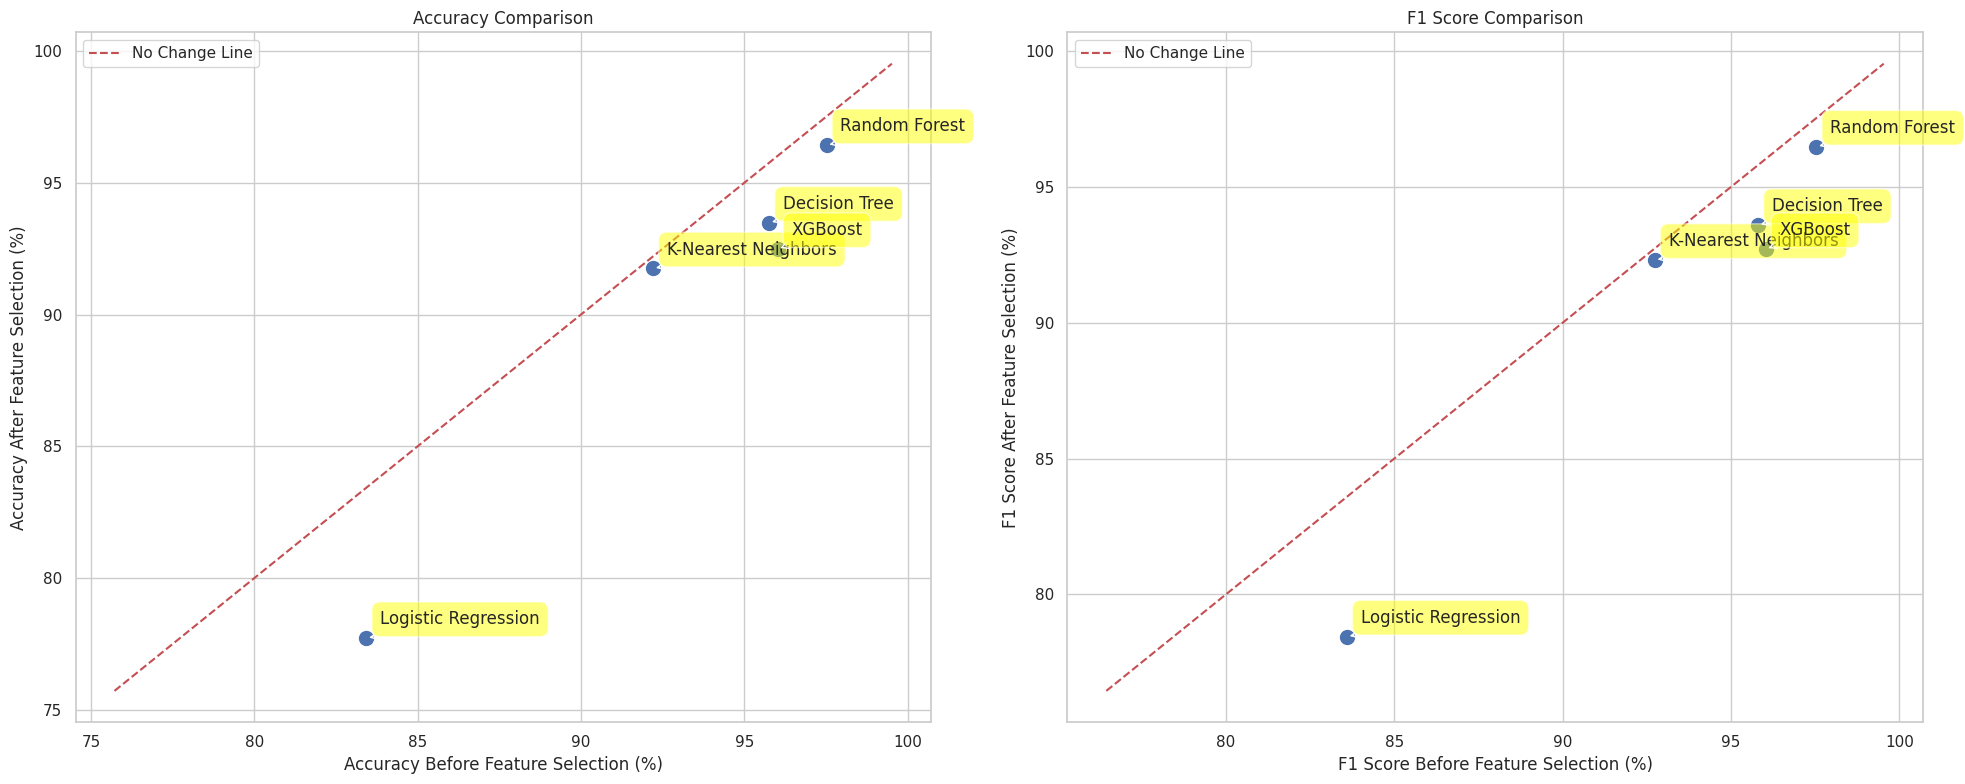


Performance Summary:

Average Metrics Before Feature Selection:
Accuracy     92.988933
Precision    91.506265
Recall       94.945673
F1 Score     93.138970
dtype: float64

Average Metrics After Feature Selection:
Accuracy     90.373470
Precision    87.944125
Recall       93.720003
F1 Score     90.707694
dtype: float64


In [ ]:
def plot_metrics_comparison():

    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    for i, metric in enumerate(metrics):
        ax = axes[i // 2, i % 2]

        x = np.arange(len(metrics_df['Model']))
        width = 0.35

        bars1 = ax.bar(x - width/2, metrics_df[metric], width, label='Before Feature Selection', color='skyblue')
        bars2 = ax.bar(x + width/2, metrics_df_pca[metric], width, label='After Feature Selection', color='lightcoral')

        ax.set_ylabel(f'{metric} (%)')
        ax.set_title(f'{metric} Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')


        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)

        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                       f'{height:.1f}%',
                       ha='center',
                       va='bottom',
                       rotation=0,
                       fontsize=9)

        add_labels(bars1)
        add_labels(bars2)

    plt.tight_layout(rect=[0, 0, 0.95, 1])
    plt.show()

def plot_model_improvement():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


    ax1.scatter(comparison_df['Accuracy_Before'], comparison_df['Accuracy_After'], s=100)
    max_acc = max(comparison_df['Accuracy_Before'].max(), comparison_df['Accuracy_After'].max()) + 2
    min_acc = min(comparison_df['Accuracy_Before'].min(), comparison_df['Accuracy_After'].min()) - 2
    ax1.plot([min_acc, max_acc], [min_acc, max_acc], 'r--', label='No Change Line')
    ax1.set_xlabel('Accuracy Before Feature Selection (%)')
    ax1.set_ylabel('Accuracy After Feature Selection (%)')
    ax1.set_title('Accuracy Comparison')


    for i, model in enumerate(comparison_df['Model']):
        ax1.annotate(model,
                    (comparison_df['Accuracy_Before'][i], comparison_df['Accuracy_After'][i]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


    ax2.scatter(comparison_df['F1_Before'], comparison_df['F1_After'], s=100)
    max_f1 = max(comparison_df['F1_Before'].max(), comparison_df['F1_After'].max()) + 2
    min_f1 = min(comparison_df['F1_Before'].min(), comparison_df['F1_After'].min()) - 2
    ax2.plot([min_f1, max_f1], [min_f1, max_f1], 'r--', label='No Change Line')
    ax2.set_xlabel('F1 Score Before Feature Selection (%)')
    ax2.set_ylabel('F1 Score After Feature Selection (%)')
    ax2.set_title('F1 Score Comparison')


    for i, model in enumerate(comparison_df['Model']):
        ax2.annotate(model,
                    (comparison_df['F1_Before'][i], comparison_df['F1_After'][i]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

plot_metrics_comparison()
plot_model_improvement()
print("\nPerformance Summary:")
print("\nAverage Metrics Before Feature Selection:")
print(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean())
print("\nAverage Metrics After Feature Selection:")
print(metrics_df_pca[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean())

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to apply low variance filtering and PCA
def apply_hybrid_feature_selection(X, y, n_components):
    # Low variance filtering
    low_variance_filter = VarianceThreshold(threshold=0.01)
    X_low_variance = low_variance_filter.fit_transform(X)
    X_low_variance_df = pd.DataFrame(X_low_variance, columns=X.columns[low_variance_filter.get_support()])

    print(f"Number of features after low variance filter: {X_low_variance_df.shape[1]}")

    # PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_low_variance_df)
    explained_variance = pca.explained_variance_ratio_

    print(f"Number of features after PCA (n_components={n_components}): {X_pca.shape[1]}")
    print(f"Explained variance by each component: {explained_variance}")

    return X_pca

# Evaluate models
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
    }

    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results['Model'].append(name)
        results['Accuracy'].append(accuracy_score(y_test, y_pred) * 100)
        results['Precision'].append(precision_score(y_test, y_pred, average='weighted') * 100)
        results['Recall'].append(recall_score(y_test, y_pred, average='weighted') * 100)
        results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted') * 100)

    return pd.DataFrame(results)

# Apply hybrid feature selection and evaluate models for different n_components
n_components_list = [5, 7, 9]
metrics_dfs = {}

for n_components in n_components_list:
    print(f"\n--- Evaluating with n_components = {n_components} ---")
    X_pca = apply_hybrid_feature_selection(X_resampled, y_resampled, n_components)
    metrics_dfs[n_components] = evaluate_models(X_pca, y_resampled)

# Print results for each n_components
for n_components, metrics_df in metrics_dfs.items():
    print(f"\nModel Performance After Feature Selection with n_components = {n_components}:")
    print(metrics_df)

comparison_df = pd.DataFrame({
    'Model': metrics_dfs[5]['Model'],  # Assuming models are the same for all
    'Accuracy_Before': metrics_df['Accuracy'],
    'Accuracy_5': metrics_dfs[5]['Accuracy'],
    'Accuracy_7': metrics_dfs[7]['Accuracy'],
    'Accuracy_9': metrics_dfs[9]['Accuracy'],
    'F1_Before': metrics_df['F1 Score'],
    'F1_5': metrics_dfs[5]['F1 Score'],
    'F1_7': metrics_dfs[7]['F1 Score'],
    'F1_9': metrics_dfs[9]['F1 Score']
})
print("\nComparison of Model Performance:")
print(comparison_df)




--- Evaluating with n_components = 5 ---
Number of features after low variance filter: 12
Number of features after PCA (n_components=5): 5
Explained variance by each component: [8.51467430e-01 1.36171014e-01 1.17695756e-02 2.58625313e-04
 8.27982815e-05]

--- Evaluating with n_components = 7 ---
Number of features after low variance filter: 12
Number of features after PCA (n_components=7): 7
Explained variance by each component: [8.51467430e-01 1.36171014e-01 1.17695756e-02 2.58625313e-04
 8.27982815e-05 6.90990022e-05 6.25559901e-05]

--- Evaluating with n_components = 9 ---
Number of features after low variance filter: 12
Number of features after PCA (n_components=9): 9
Explained variance by each component: [8.51467430e-01 1.36171014e-01 1.17695756e-02 2.58625313e-04
 8.27982815e-05 6.90990022e-05 6.25559901e-05 4.17861811e-05
 3.29308257e-05]

Model Performance After Feature Selection with n_components = 5:
                 Model   Accuracy  Precision     Recall   F1 Score
0  K-Nea